# 5G Intrusion Detection Dataset


    É um dataset público com pacotes de tráfego da rede nuclear 5G, visando pesquisa em detecção de intrusões. Ele foi gerado em ambiente simulado, utilizando Open5GS e UERANSIM
    GitHub
    .

    Cobre tráfego normal e várias formas de ataques simulados:

        DDoS (incluindo SYN Flood e UDP Flood),

        Ataques ao PFCP,

        Ataques de IP Spoofing
        GitHub
        .

In [ ]:
import pandas as pd
import numpy as np

# The training data is split into two subsets which can be combined.
try:
   
    df_train1 = pd.read_csv('../dataset/Train_subset_1.csv')
    df_train2 = pd.read_csv('../dataset/Train_subset_2.csv')
    
   
    df_train = pd.concat([df_train1, df_train2], ignore_index=True)
    
    print("Training data loaded successfully!")
    print("Shape of the combined training dataset:", df_train.shape)
    

    df_test = pd.read_csv('../dataset/Test_Data.csv')
    print("Shape of the test dataset:", df_test.shape)

except FileNotFoundError:
    print("Error: Dataset file not found. Please download the files first.")
    print("See the 'File Structure' section for instructions on data access.")

Training data loaded successfully!
Shape of the combined training dataset: (30288, 45)
Shape of the test dataset: (3787, 45)


Tamanho do treino: (30288, 45)
Tamanho do teste: (3787, 45)

Distribuição de classes (treino):
 label
0    23888
1     6400
Name: count, dtype: int64

Distribuição de classes (teste):
 label
0    2987
1     800
Name: count, dtype: int64


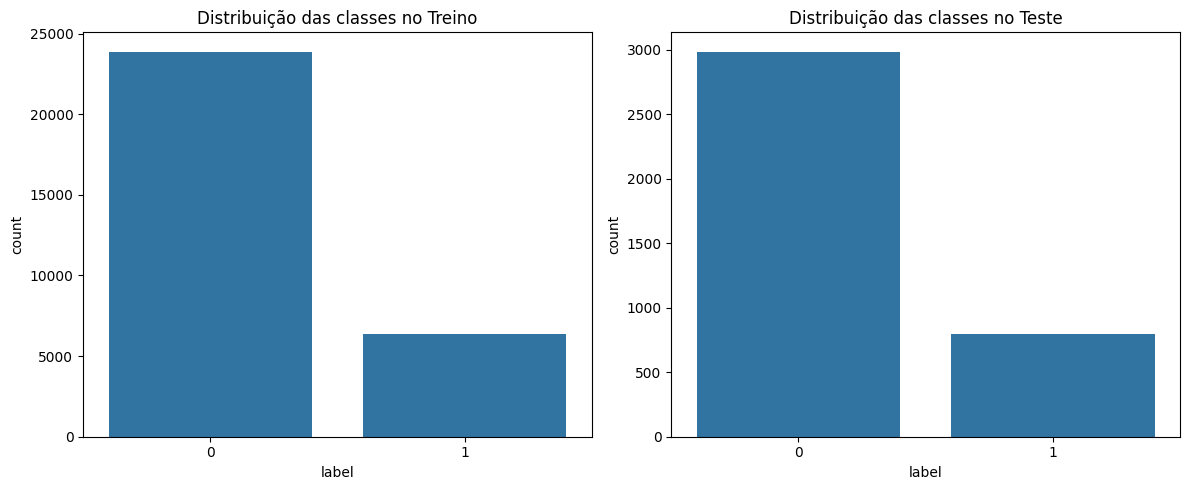


Valores ausentes por coluna:
ip.len                                 0
udp.length                             0
frame.time_delta                       0
tcp.time_relative                      0
tcp.time_delta                         0
gtp.ext_hdr                            0
gtp.ext_hdr.length                     0
gtp.ext_hdr.pdu_ses_con.pdu_type       0
gtp.ext_hdr.pdu_ses_con.qos_flow_id    0
gtp.ext_hdr.pdu_ses_cont.ppp           0
dtype: int64


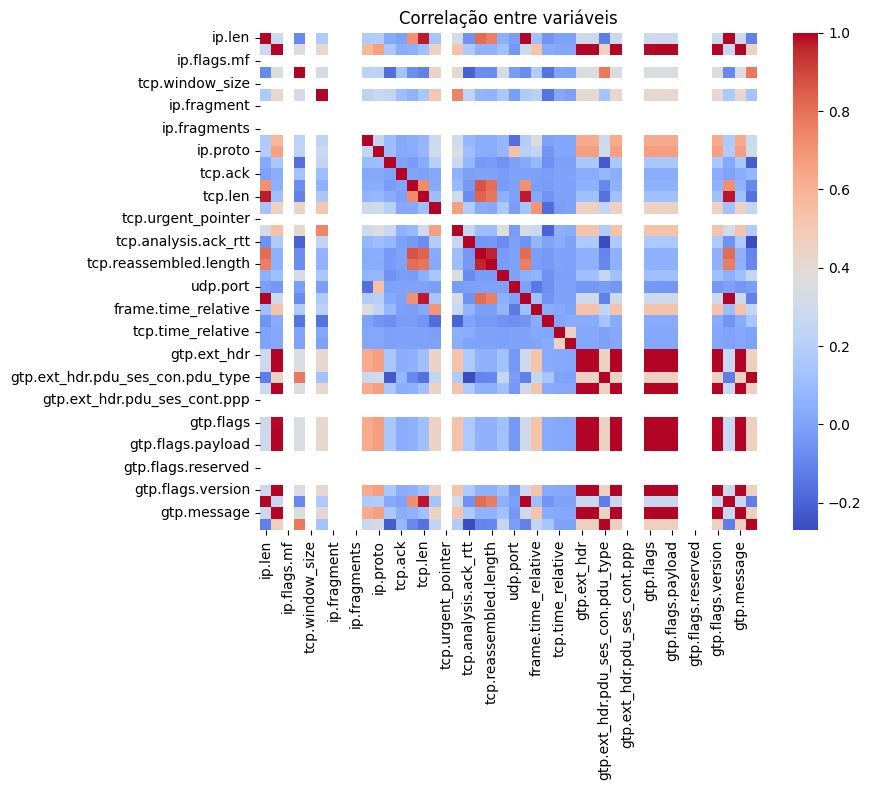


Top 10 variáveis mais correlacionadas com a label:
 gtp.flags.version                      1.000000
gtp.ext_hdr.length                     1.000000
gtp.ext_hdr.pdu_ses_con.qos_flow_id    1.000000
gtp.flags.e                            1.000000
gtp.ext_hdr                            1.000000
gtp.flags.payload                      1.000000
gtp.message                            0.999998
gtp.flags                              0.999943
ip.flags.df                            0.995144
ip.proto                               0.663544
Name: label, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print(f"Tamanho do treino: {df_train.shape}")
print(f"Tamanho do teste: {df_test.shape}")

# Distribuição das classes
print("\nDistribuição de classes (treino):\n", df_train['label'].value_counts())
print("\nDistribuição de classes (teste):\n", df_test['label'].value_counts())

# Visualização das distribuições
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='label', data=df_train)
plt.title("Distribuição das classes no Treino")
plt.subplot(1, 2, 2)
sns.countplot(x='label', data=df_test)
plt.title("Distribuição das classes no Teste")
plt.tight_layout()
plt.show()


print("\nValores ausentes por coluna:")
print(df_train.isnull().sum().sort_values(ascending=False).head(10))


plt.figure(figsize=(10, 8))
corr = df_train.drop(columns=['label']).corr()
sns.heatmap(corr, cmap='coolwarm', square=True, cbar=True)
plt.title("Correlação entre variáveis")
plt.tight_layout()
plt.show()


cor_target = df_train.corr()['label'].abs().sort_values(ascending=False)
print("\nTop 10 variáveis mais correlacionadas com a label:\n", cor_target[1:11])

In [6]:
df_train.head()  

,ip.len,ip.flags.df,ip.flags.mf,tcp.port,tcp.window_size,tcp.ack_raw,ip.fragment,ip.fragment.count,ip.fragments,ip.ttl,...,gtp.flags.e,gtp.flags.payload,gtp.flags.pn,gtp.flags.reserved,gtp.flags.s,gtp.flags.version,gtp.length,gtp.message,gtp.teid,label
0,96.0,1.0,0.0,80.0,0.0,2.621405e+09,0.0,0.0,0.0,64.0,...,1.0,1.0,0.0,0.0,0.0,1.0,60.0,255,1,0
1,128.0,1.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,64.0,...,1.0,1.0,0.0,0.0,0.0,1.0,92.0,255,1,0
2,307.0,1.0,0.0,80.0,0.0,1.248648e+09,0.0,0.0,0.0,64.0,...,1.0,1.0,0.0,0.0,0.0,1.0,271.0,255,1,0
3,28.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,63.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,-1,1
4,28.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,-1,1
